In [136]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set()

# Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

    quadratic (second degree polynomial)
    logarithmic (log(x))
    
(The second one should fit really well, since it has the same form as the underlying model!)

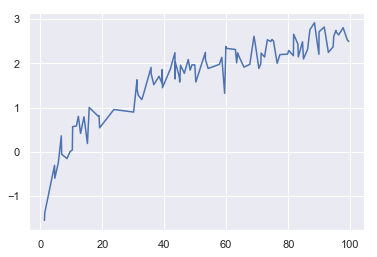

In [137]:
x = np.random.uniform(0, 100, 101)
noise = np.random.normal(2, 0.25, 101) 
y = np.log(x) - noise

df = pd.DataFrame({'x':x, 'noise': noise, 'y':y})
df.sort_values('x',inplace=True)
plt.plot(df['x'],df['y'])

In [138]:
features = pd.DataFrame(df['x'])
target = pd.DataFrame(df['y'])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=34)

In [140]:
poly2 = PolynomialFeatures(degree=2) 
lr = LinearRegression()
lr.fit(poly2.fit_transform(X_train),y_train)
lr.score(poly2.transform(X_train),y_train)

0.909062277423237

In [141]:
lr.score(poly2.transform(X_test),y_test)

0.8128996129210895

In [142]:
logx = np.log(features)
X_train, X_test, y_train, y_test = train_test_split(logx, target, test_size=0.25, random_state=34)

In [143]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.941001423510894

In [144]:
lr.score(X_test,y_test)

0.8950216627252827

It *does* fit well!

# Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

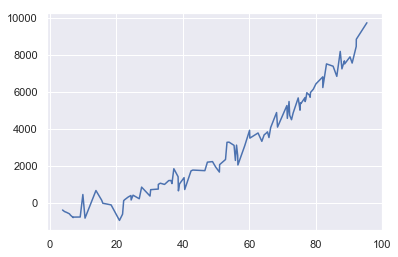

In [145]:
x = np.random.uniform(0, 100, 101)
noise = np.random.normal(500, 400, 101) 
y = 3*x + x**2 - noise

df = pd.DataFrame({'x':x, 'noise': noise, 'y':y})
df.sort_values('x',inplace=True)
plt.plot(df['x'],df['y'])

In [146]:
features = pd.DataFrame(df['x'])
target = pd.DataFrame(df['y'])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=34)

In [148]:
poly2 = PolynomialFeatures(degree=2) 
lr = LinearRegression()
lr.fit(poly2.fit_transform(X_train),y_train)
lr.score(poly2.transform(X_train),y_train)

0.985129989270612

In [149]:
lr.score(poly2.transform(X_test),y_test)

0.9649758578409424

In [150]:
mean_squared_error(y_train, lr.predict(poly2.fit_transform(X_train)))

116786.92696791617

In [151]:
lr.score(poly2.fit_transform(X_test),y_test)

0.9649758578409424

In [152]:
mean_squared_error(y_test, lr.predict(poly2.fit_transform(X_test)))

245059.0780589681

# Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

    training error
    test error
    R squared
    AIC


In [153]:
my_list = []

for i in range(0,8):
    my_dict = dict()
    poly = PolynomialFeatures(i)
    
    lr = LinearRegression()
    lr.fit(poly.fit_transform(X_train),y_train)
    
    my_dict['training_error'] = np.sqrt(mean_squared_error(lr.predict(poly.fit_transform(X_train)),y_train))  
    my_dict['test_error'] = np.sqrt(mean_squared_error(lr.predict(poly.fit_transform(X_test)),y_test))
    my_dict['R_squared'] = lr.score(poly.transform(X_test),y_test)
    
    my_list.append(my_dict)

df = pd.DataFrame(my_list)

In [154]:
df

,R_squared,test_error,training_error
0,-0.069593,2735.652096,2802.473241
1,0.891677,870.586665,686.626656
2,0.964976,495.034421,341.741023
3,0.967071,480.000333,338.385013
4,0.963899,502.585141,335.330715
5,0.963185,507.535834,334.695983
6,0.963450,505.703991,331.928797
7,0.962809,510.121013,331.876711


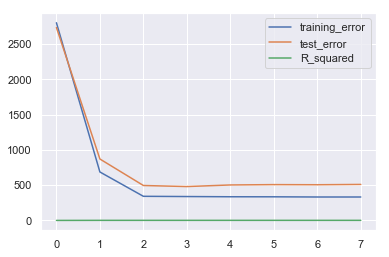

In [155]:
for fit in ['training_error','test_error','R_squared']:
    plt.plot(df.index,df[fit])
plt.legend(['training_error','test_error','R_squared'])

# Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [164]:
learn_list = []
i = 5

while i < 101:
    learning = {}
    learning['m'] = str(i)
    lr.fit(poly2.fit_transform(features[0:i]),target[0:i])
    learning['training_error'] = np.sqrt(mean_squared_error(lr.predict(poly2.transform(features[0:i])),target[0:i]))
    
    if i<100:
        learning['test_error'] = np.sqrt(mean_squared_error(lr.predict(poly2.transform(features[i:])),target[i:]))
    else:
        learning['test_error'] = np.sqrt(mean_squared_error(lr.predict(poly2.transform(features[0:i])),target[0:i]))
        
    learn_list.append(learning)
    i += 5
    
df_learn = pd.DataFrame(learn_list)
df_learn

,m,test_error,training_error
0,5,24624.096123,14.140501
1,10,103824.296274,334.830186
2,15,30686.239686,414.198777
3,20,7249.418886,429.409132
4,25,1602.351816,404.766656
5,30,1252.309077,375.039369
6,35,1997.503178,360.471331
7,40,567.886021,379.338353
8,45,598.346005,363.916968
9,50,414.264740,385.505881


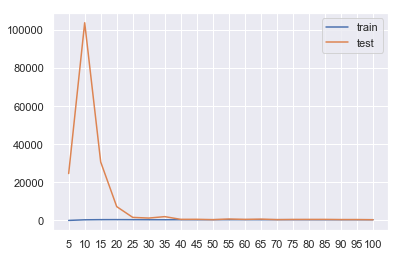

In [163]:
for fit in ['train', 'test']:
    plt.plot(df_learn['m'], df_learn[fit])
plt.legend(['train', 'test'])